# Image formation, projection, transformation
## Configure the environment
Here we neel three tools
- **NumPy**:NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more.

- **cv2(openCV-python)**: OpenCV provides a real-time optimized Computer Vision library, tools, and hardware. It also supports model execution for Machine Learning (ML) and Artificial Intelligence (AI)

- **matplotlib**:Visualization with Python. Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python. 

In [1]:
# firstly, you must install some required packages and then import opencv-python numpy matplotlib.
import numpy as np
import cv2
from matplotlib import pyplot as plt

Notice：if you dont install numpy before your type jupyter lab in your terminal,and run the import numpy as np, you will get the error like this:

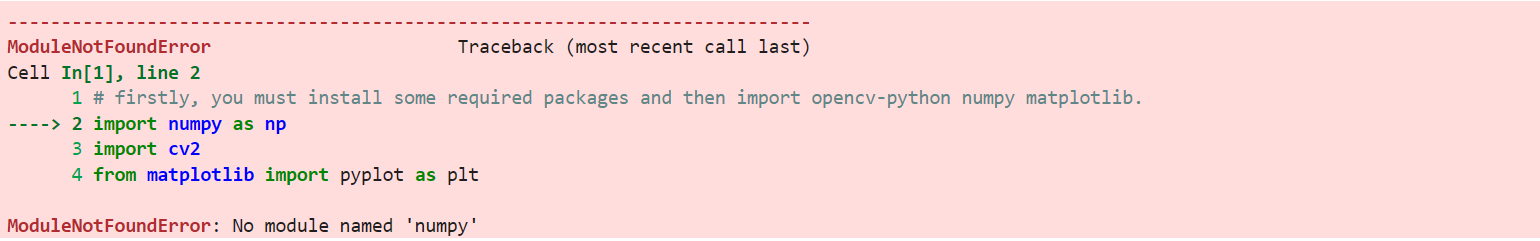

To solve this bug, you need install this package in your env, like this:
`conda install numpy`. 
Then after you install the missing package and run the above cell again, you will success


## 1 Basic Image IO and converter by Opencv
Digital images are made of pixels.
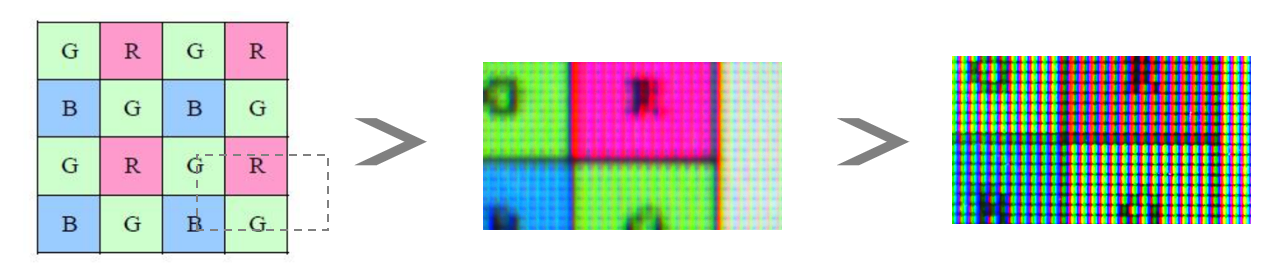
There are many color composition modes->color spaces
- RGB/BGR(r,red;g,green;b,blue)
- CIE xyz
- HSV(h,hue;s,saturation;v,value)

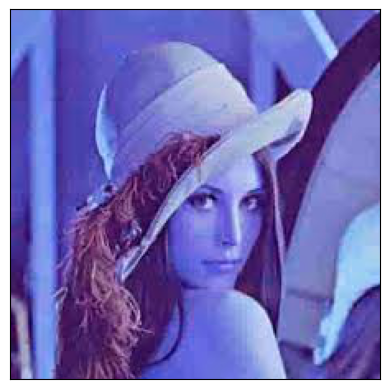

In [4]:
# 1. Read Image and Show
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

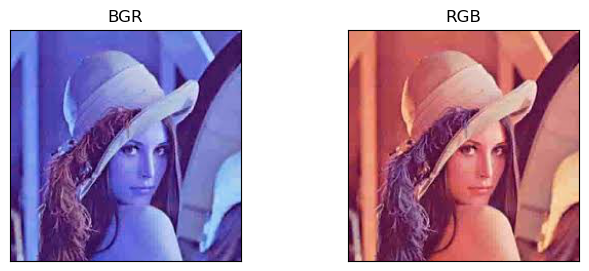

In [6]:
# 2. Convert BGR to RGB
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR into RGB

plt.figure(1, figsize=(8,3))  # Create Figure 1 with a size of 8x3
#
ax1 = plt.subplot(1,2,1)  # Create subplot 1
plt.sca(ax1)              # Choose subplot 1
plt.imshow(img)           # show image on subplot1
plt.xticks([]),plt.yticks([])  #hide tick values on X and Y axis
plt.title("BGR")          # set title

ax2 = plt.subplot(1,2,2)  # Create subgplot 2
plt.sca(ax2)              # Choose subplot 2
plt.imshow(img_rgb)       # show image on subplot1
plt.xticks([]),plt.yticks([])  #hide tick values on X and Y axis
plt.title("RGB")          # set title
plt.show()                # show Figure 1  

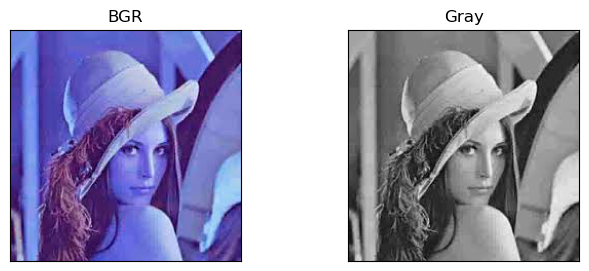

In [7]:
# 3. Convert BGR to Gray
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img_gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert BGR into GRAY

plt.figure(figsize=(8,3))
#
ax1 = plt.subplot(1,2,1)  # Create subplot 1
plt.sca(ax1)              # Choose subplot 1
plt.imshow(img)           # show image on subplot1
plt.xticks([]),plt.yticks([])  #hide tick values on X and Y axis
plt.title("BGR")          # set title

ax2 = plt.subplot(1,2,2)  # Create subgplot 2
plt.sca(ax2)              # Choose subplot 2
plt.imshow(img_gray, cmap="gray")    # show image on subplot1
plt.xticks([]),plt.yticks([])  #hide tick values on X and Y axis
plt.title("Gray")          # set title
plt.show()                # show Figure 1  

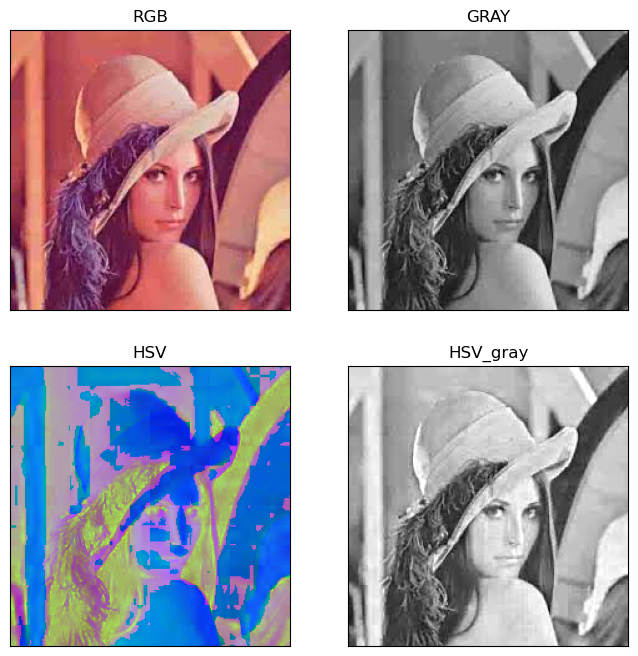

In [8]:
# 4.Convert BGR into HSV
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)  # Convert BGR into HSV
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR into RGB
img_gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert BGR into GRAY

plt.figure(figsize=(8,8))
#
ax1 = plt.subplot(2,2,1)  # Create subplot 1
plt.sca(ax1)
plt.imshow(img_rgb)
plt.xticks([]),plt.yticks([])
plt.title("RGB")
   
ax2 = plt.subplot(2,2,2)   # Create subplot 2
plt.sca(ax2)
plt.imshow(img_gray, cmap="gray")
plt.xticks([]),plt.yticks([])
plt.title("GRAY")

ax3 = plt.subplot(2,2,3)  # Create subplot 3
plt.sca(ax3)
plt.imshow(img_hsv)
plt.xticks([]),plt.yticks([])
plt.title("HSV")

ax4 = plt.subplot(2,2,4)   # Create subplot 4
plt.sca(ax4)
plt.imshow(img_hsv[:,:,2], cmap='gray')
plt.xticks([]),plt.yticks([])
plt.title("HSV_gray")

plt.show()

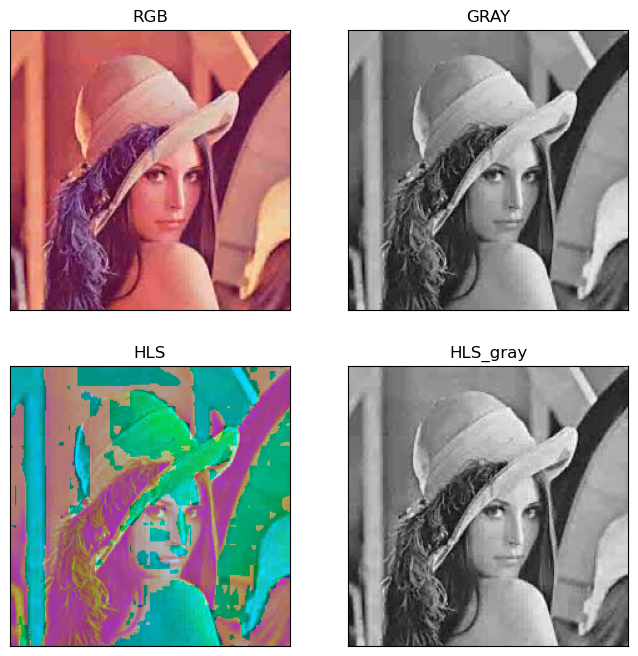

In [9]:
# 4.Convert BGR into HLS
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img_hls = cv2.cvtColor(img, cv2.COLOR_BGR2HLS)  # Convert BGR into HLS
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR into RGB
img_gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  # Convert BGR into GRAY

plt.figure(figsize=(8,8))
#
ax1 = plt.subplot(2,2,1)  # Create subplot 1
plt.sca(ax1)
plt.imshow(img_rgb)
plt.xticks([]),plt.yticks([])
plt.title("RGB")
   
ax2 = plt.subplot(2,2,2)   # Create subplot 2
plt.sca(ax2)
plt.imshow(img_gray, cmap="gray")
plt.xticks([]),plt.yticks([])
plt.title("GRAY")

ax3 = plt.subplot(2,2,3)  # Create subplot 3
plt.sca(ax3)
plt.imshow(img_hls)
plt.xticks([]),plt.yticks([])
plt.title("HLS")

ax4 = plt.subplot(2,2,4)   # Create subplot 4
plt.sca(ax4)
plt.imshow(img_hls[:,:,1], cmap='gray')
plt.xticks([]),plt.yticks([])
plt.title("HLS_gray")

plt.show()

Check https://en.wikipedia.org/wiki/HSL_and_HSV for HSV HSL color system

## Practice: image converting by yourself!
Ref: https://en.wikipedia.org/wiki/HSL_and_HSV#General_approach

1. Convert RGB from [0, 255] to [0, 1]
2. Calculate HSV
   https://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html#cvtcolor

(225, 225, 3)
height:225, width:225, channels:3
151875


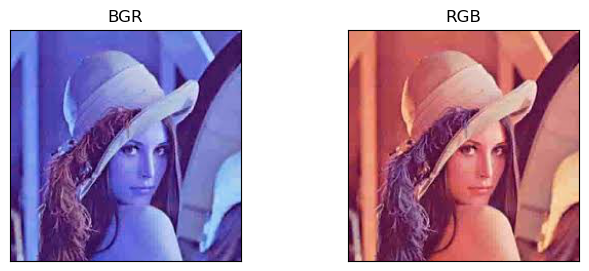

In [10]:
# 1.1 Convert BGR into RGB by yourself 
def bgr_to_rgb(channel):
    """
    Change one BRG channel to HSV channel.
    :param channel: [B, G, R] of a point in image.
    :return: [R, G, B]
    """
    b = channel[0]
    g = channel[1]
    r = channel[2]
    return [r, g, b]
    
# 1.2 Show image

img =cv2.imread('lenna.jpg')   # Read image in BGR mode

plt.figure(figsize=(8,3))
#
ax1 = plt.subplot(1,2,1)  # Create subplot 1
plt.sca(ax1)              # Choose subplot 1
plt.imshow(img)           # show image on subplot1
plt.xticks([]),plt.yticks([])  #hide tick values on X and Y axis
plt.title("BGR")          # set title


print(img.shape)
height = img.shape[0]
width = img.shape[1]
channels = img.shape[2]
print("height:%s, width:%s, channels:%s" % (height,width,channels))
print(img.size)
for row in range(height):    #遍历每一行
    for col in range(width): #遍历每一列
         img[row][col] = bgr_to_rgb(img[row][col])
        
ax2 = plt.subplot(1,2,2)  # Create subgplot 2
plt.sca(ax2)              # Choose subplot 2
plt.imshow(img)          # show image on subplot1
plt.xticks([]),plt.yticks([])  #hide tick values on X and Y axis
plt.title("RGB")          # set title

plt.show()                # show Figure 1  

*You can also directly use* `return channel[::-1]`

(225, 225, 3)
height:225, width:225, channels:3
151875


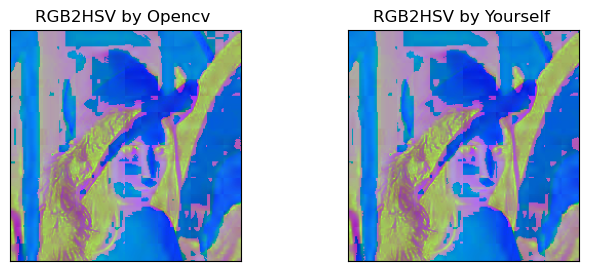

In [ ]:
### 2.1 Convert BGR to HSV by yourself

def bgr_to_hsv(channel):
    """
        Change one BRG channel to HSV channel.
        :param channel: [B, G, R] of a point in image.
        :return: HSV channel
    """
    b, g, r = channel[0] / 255.0, channel[1] / 255.0, channel[2] / 255.0
    
    max_value = max(r, g, b)
    min_value = min(r, g, b)
    
    delta = max_value - min_value
    
    V = max_value
    if max_value ==0: # avoid division by zero
        S = 0 
    else:
        S = delta/max_value
        
    if delta ==0:
        H =0
    elif max_value==r:
        if g>=b:
            H = 60 *(g-b)/delta
        else:
            H = 60 *(g-b)/delta + 360
    elif max_value==g:
        H = 120 + 60 *(b-r)/delta
    else:
        H = 240 + 60 *(r-g)/delta
    
    return [H/2.0, S*255.0, V*255.0]

### 2.2 Show image

img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

plt.figure(figsize=(8,3))
ax1 = plt.subplot(1,2,1)  # Create subplot 1
plt.sca(ax1)              # Choose subplot 1
plt.imshow(img_hsv)           # show image on subplot1
plt.xticks([]),plt.yticks([])  #hide tick values on X and Y axis
plt.title("RGB2HSV by Opencv ")          # set title

print(img.shape)
height = img.shape[0]
width = img.shape[1]
channels = img.shape[2]
print("height:%s, width:%s, channels:%s" % (height,width,channels))
print(img.size)
for row in range(height):    #遍历每一行
    for col in range(width): #遍历每一列
         img[row][col] = bgr_to_hsv(img[row][col])
        
ax2 = plt.subplot(1,2,2)  # Create subgplot 2
plt.sca(ax2)              # Choose subplot 2
plt.imshow(img)          # show image on subplot1
plt.xticks([]),plt.yticks([])  #hide tick values on X and Y axis
plt.title("RGB2HSV by Yourself ")          # set title

plt.show()                # show Figure 1  

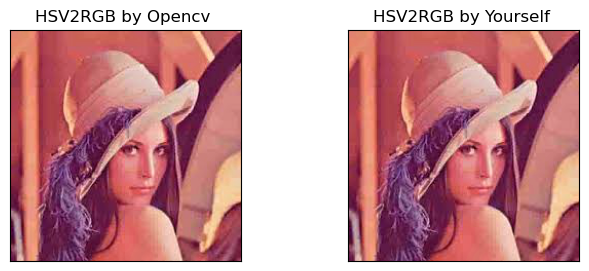

In [12]:
### 3.1 Convert HSV to RGB by yourself

def hsv_to_rgb(channel):
    h = channel[0] / 180.0
    s = channel[1] / 255.0
    v = channel[2] / 255.0
    if s == 0.0:
        return v, v, v
    i = int(h*6.0) # XXX assume int() truncates!
    f = (h*6.0) - i
    p = v*(1.0 - s)
    q = v*(1.0 - s*f)
    t = v*(1.0 - s*(1.0-f))
    i = i%6
    rgb = []
    if i == 0:
        rgb = [v, t, p]
    if i == 1:
        rgb = [q, v, p]
    if i == 2:
        rgb = [p, v, t]
    if i == 3:
        rgb = [p, q, v]
    if i == 4:
        rgb = [t, p, v]
    if i == 5:
        rgb = [v, p, q]
    rgb = [i * 255 for i in rgb]
    return rgb
    
### 3.2 Show image

img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_rgb = cv2.cvtColor(img_hsv, cv2.COLOR_HSV2RGB)

plt.figure(figsize=(8,3))
ax1 = plt.subplot(1,2,1)  # Create subplot 1
plt.sca(ax1)              # Choose subplot 1
plt.imshow(img_rgb)           # show image on subplot1
plt.xticks([]),plt.yticks([])  #hide tick values on X and Y axis
plt.title("HSV2RGB by Opencv ")          # set title


for row in range(height):    #遍历每一行
    for col in range(width): #遍历每一列
         img[row][col] = bgr_to_hsv(img[row][col])
         img[row][col] = hsv_to_rgb(img[row][col])
        
ax2 = plt.subplot(1,2,2)  # Create subgplot 2
plt.sca(ax2)              # Choose subplot 2
plt.imshow(img)          # show image on subplot1
plt.xticks([]),plt.yticks([])  #hide tick values on X and Y axis
plt.title("HSV2RGB by Yourself ")          # set title

plt.show()                # show Figure 1  


## Practice to achieve 4.2 and 5.2 by yourself

In [13]:
### 4.1 Convert BGR to HLS by yourself
def bgr_to_hls(channel):
    channel = channel / 255.0
    b = channel[0]
    g = channel[1]
    r = channel[2]
    maxc = max(r, g, b)
    minc = min(r, g, b)
    # XXX Can optimize (maxc+minc) and (maxc-minc)
    l = (minc+maxc)/2.0
    if minc == maxc:
        return 0.0, l, 0.0
    if l <= 0.5:
        s = (maxc-minc) / (maxc+minc)
    else:
        s = (maxc-minc) / (2.0-maxc-minc)
    rc = (maxc-r) / (maxc-minc)
    gc = (maxc-g) / (maxc-minc)
    bc = (maxc-b) / (maxc-minc)
    if r == maxc:
        h = bc-gc
    elif g == maxc:
        h = 2.0+rc-bc
    else:
        h = 4.0+gc-rc
    h = (h/6.0) % 1.0
    return [h * 180, l * 255, s * 255]

### 4.2 Show image

### imread ---> Convert to HLS by opencv ---> Create subplot1 ---> Convert to HLS by yourself ---> Create subplot2 ---> show
 






In [14]:
### 5.1 Convert HLS to RGB by yourself
ONE_THIRD = 1.0/3.0
ONE_SIXTH = 1.0/6.0
TWO_THIRD = 2.0/3.0

def _v(m1, m2, hue):
    hue = hue % 1.0
    if hue < ONE_SIXTH:
        return m1 + (m2-m1)*hue*6.0
    if hue < 0.5:
        return m2
    if hue < TWO_THIRD:
        return m1 + (m2-m1)*(TWO_THIRD-hue)*6.0
    return m1


def hls_to_rgb(channel):
    h = channel[0] / 180.0
    l = channel[1] / 255.0
    s = channel[2] / 255.0
    if s == 0.0:
        return l, l, l
    if l <= 0.5:
        m2 = l * (1.0+s)
    else:
        m2 = l+s-(l*s)
    m1 = 2.0*l - m2
    rgb = (_v(m1, m2, h+ONE_THIRD), _v(m1, m2, h), _v(m1, m2, h-ONE_THIRD))
    rgb = [i * 255 for i in rgb]
    return rgb

### 5.2 Show image

###  imread ---> Convert from BGR to HLS by opencv ---> Convert from HLS to RGB by opencv ---> Create subplot1 
###   ---> Convert from BGR to HLS by yourself ---> Convert from HLS to RGB by yourself---> Create subplot2 ---> show






In [15]:
def trans_pixels(img, trans_type):
    print(img.shape)
    height = img.shape[0]
    width = img.shape[1]
    channels = img.shape[2]
    print("height:%s,width:%s,channels:%s" % (height,width,channels))
    print(img.size)
    for row in range(height):    #遍历每一行
        for col in range(width): #遍历每一列
            if trans_type == "BGR2RGB":
                img[row][col] = bgr_to_rgb(img[row][col])
            if trans_type == "BGR2HSV":
                img[row][col] = bgr_to_hsv(img[row][col])
            if trans_type == "BGR2HLS":
                img[row][col] = bgr_to_hls(img[row][col])
            if trans_type == "HSV2RGB":
                img[row][col] = hsv_to_rgb(img[row][col])
            if trans_type == "HLS2RGB":
                img[row][col] = hls_to_rgb(img[row][col])
    return img

(225, 225, 3)
height:225,width:225,channels:3
151875


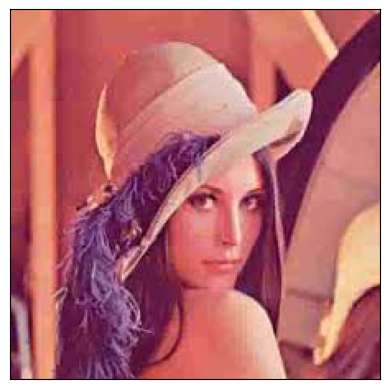

In [16]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = trans_pixels(img, "BGR2RGB")
plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

(225, 225, 3)
height:225,width:225,channels:3
151875


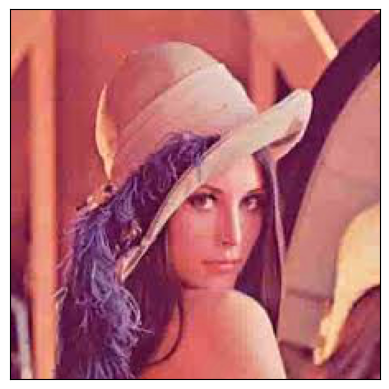

In [17]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = trans_pixels(img, "BGR2HSV")
img = cv2.cvtColor(img, cv2.COLOR_HSV2RGB)
plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

(225, 225, 3)
height:225,width:225,channels:3
151875
(225, 225, 3)
height:225,width:225,channels:3
151875


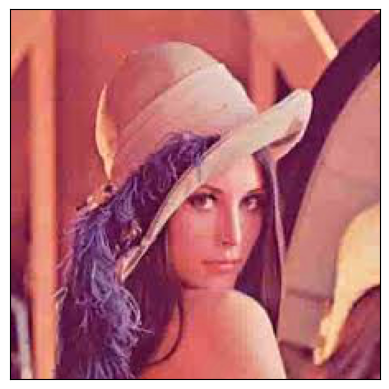

In [18]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = trans_pixels(img, "BGR2HSV")
img = trans_pixels(img, "HSV2RGB")
plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

(225, 225, 3)
height:225,width:225,channels:3
151875


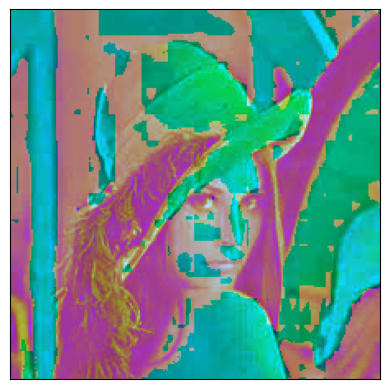

In [19]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = trans_pixels(img, "BGR2HLS")
plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

(225, 225, 3)
height:225,width:225,channels:3
151875
(225, 225, 3)
height:225,width:225,channels:3
151875


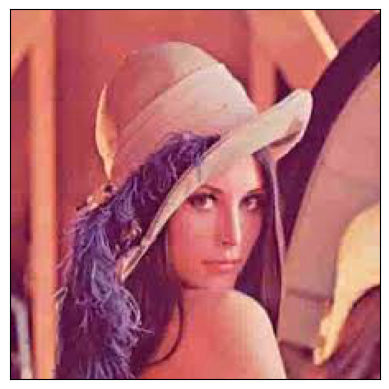

In [20]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = trans_pixels(img, "BGR2HLS")
img = trans_pixels(img, "HLS2RGB")
plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

## 2 Simple drawing technique


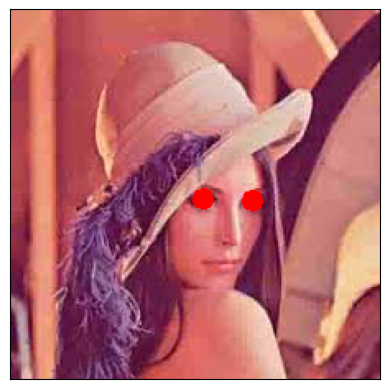

In [21]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw a circle
cv2.circle(img, center = (117, 115), radius =3, color = (255, 0, 0), thickness = 5)
cv2.circle(img, center = (147, 116), radius =3, color = (255, 0, 0), thickness = 5)

plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

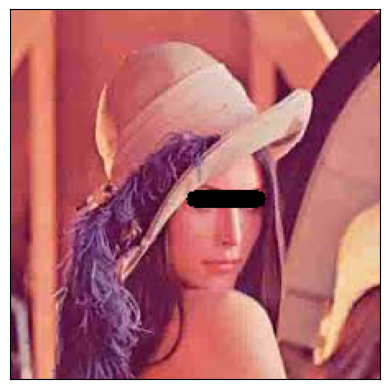

In [22]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw a circle
cv2.line(img, pt1 = (112, 115), pt2 = (150, 115), color = (0, 0, 0), thickness = 10)

plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

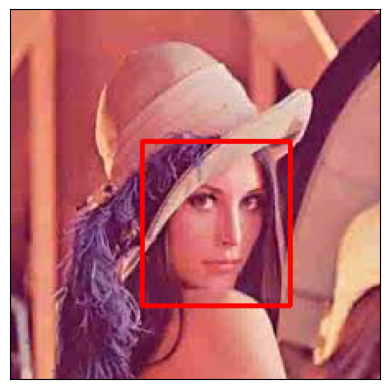

In [23]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw a rectangle
cv2.rectangle(img, pt1 = (80, 80), pt2 =(170, 180), color = (255, 0, 0), thickness = 2)

plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [7]:
def dot_pixel(img, x, y, color, thickness):
    height = img.shape[0]
    width = img.shape[1]
    x = x - thickness
    y = y - thickness
    length = 2 * thickness + 1
    x = [0, x][x > 0]
    y = [0, y][y > 0]
    x = [width - length, x][x + length < width]
    y = [height - length, y][y + length < height]
    for i in range(length):
        for j in range(length):
            img[x+i][y+j] = color
    return img

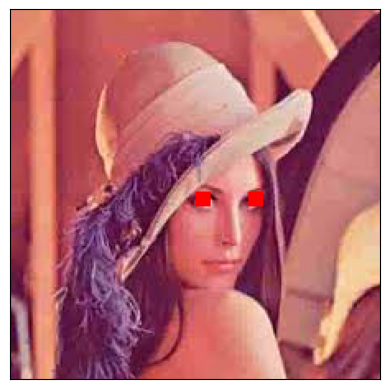

In [8]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw a dot
img = dot_pixel(img, 115, 117, color=(255, 0, 0), thickness=4)
img = dot_pixel(img, 115, 149, color=(255, 0, 0), thickness=4)

plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

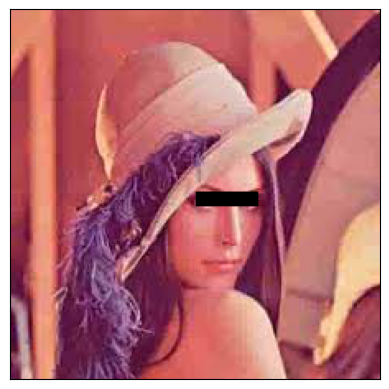

In [26]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw a line
pt = [115, 117]
length = 30
for i in range(length):
    img = dot_pixel(img, pt[0], pt[1]+i, color=(0, 0, 0), thickness=4)

plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [ ]:
def line_pixel(img, pt1, pt2, dense, color, thickness):
    points = [[pt1, pt2]]
    img = dot_pixel(img, pt1[0], pt1[1], color, thickness)
    img = dot_pixel(img, pt2[0], pt2[1], color, thickness)
    k = 1
    while(dense):# 迭代的次数，即线段的密集程度
        for i in range(k):
            item = points.pop(0)
            mid = [(item[0][0] + item[1][0])//2, (item[0][1] + item[1][1])//2]# 求中点
            img = dot_pixel(img, mid[0], mid[1], color, thickness)
            points.append([item[0], mid])
            points.append([mid, item[1]])
        k = k * 2
        dense -= 1
    return img

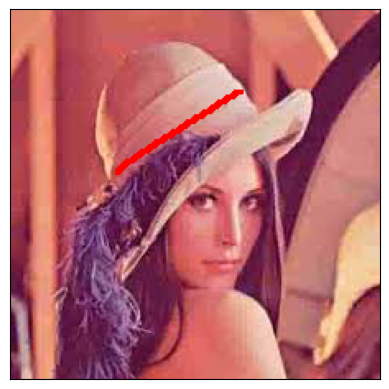

In [28]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw a line
img = line_pixel(img, [99, 65], [50, 140], dense=10, color=(255, 0, 0), thickness=1)

plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

In [29]:
def box_pixel(img, pt1, pt2, pt3, pt4, dense, color, thickness):
    img = line_pixel(img, pt1, pt2, dense, color, thickness)
    img = line_pixel(img, pt2, pt3, dense, color, thickness)
    img = line_pixel(img, pt3, pt4, dense, color, thickness)
    img = line_pixel(img, pt4, pt1, dense, color, thickness)
    return img

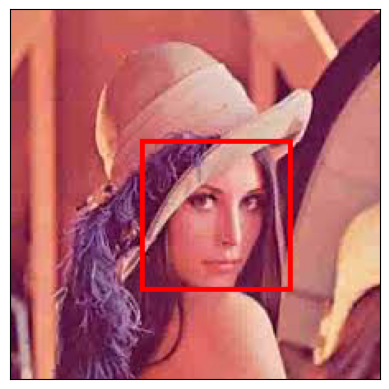

In [30]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw a line
pt1 = [80, 80]
pt2 = [80, 170]
pt3 = [170, 170]
pt4 = [170, 80]
img = box_pixel(img, pt1, pt2, pt3, pt4, dense=10, color=(255, 0, 0), thickness=1)

plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

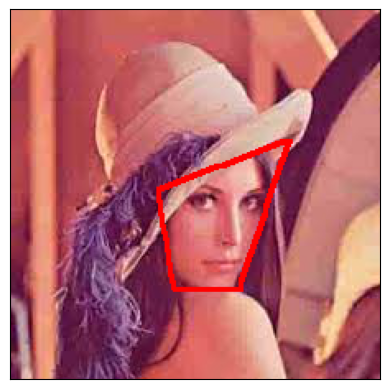

True

In [31]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Draw a line
pt1 = [110, 90]
pt2 = [80, 170]
pt3 = [170, 140]
pt4 = [170, 100]
img = box_pixel(img, pt1, pt2, pt3, pt4, dense=10, color=(255, 0, 0), thickness=1)

plt.imshow(img)
plt.xticks([]),plt.yticks([])  # to hide tick values on X and Y axis
plt.show()

cv2.imwrite('lenna4trans.jpg',img) #save the image 4 following test

## 3 Image Transformations

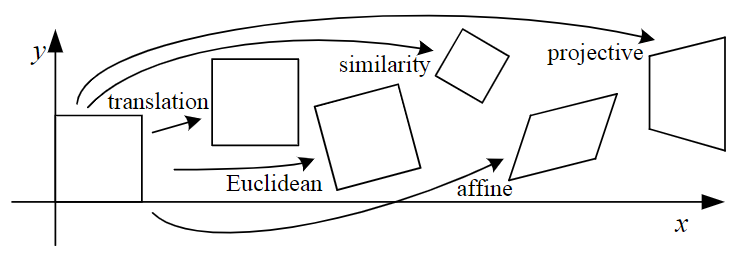


### 3.1 Scaling

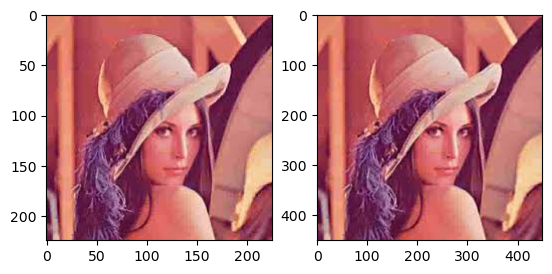

In [32]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
res = cv2.resize(img,None,fx=2, fy=2, interpolation = cv2.INTER_CUBIC) #also have other interp method
 
##OR another way to do image scaling
 
#height, width = img.shape[:2]
#res = cv2.resize(img,(2*width, 2*height), interpolation = cv2.INTER_CUBIC)

ax1 = plt.subplot(1,2,1)
plt.sca(ax1) 
plt.imshow(img)

ax2 = plt.subplot(1,2,2)
plt.sca(ax2) 
plt.imshow(res)

### 3.2 Translation
Translation is the shifting of an object's location. If you know the shift in the (x,y) direction and let it be ($t_x,t_y$)
, you can create the transformation matrix as follows:
$$
M=\begin{bmatrix}
1 & 0 & t_x \\
0 & 1 & t_y
\end{bmatrix}
$$

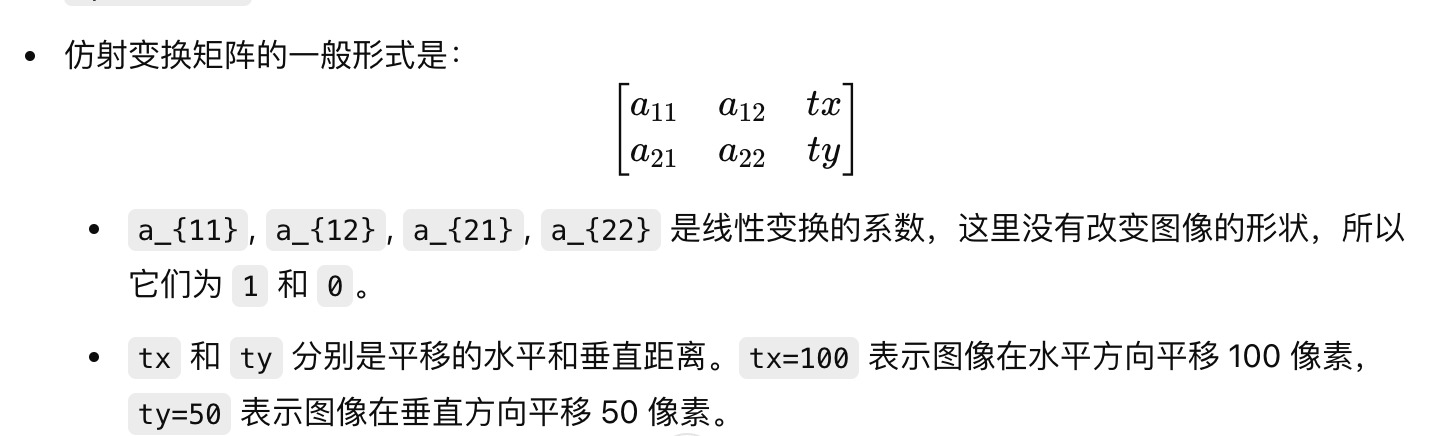

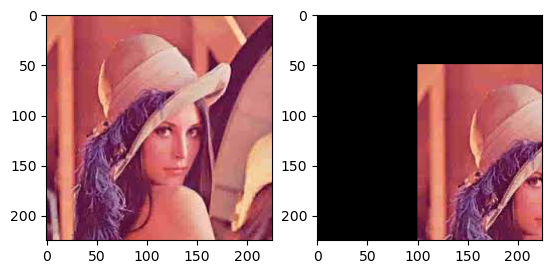

In [33]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows,cols = img.shape[:2]
 
M = np.float32([[1,0,100],[0,1,50]])
dst = cv2.warpAffine(img,M,(cols,rows))
 
ax1 = plt.subplot(1,2,1)
plt.sca(ax1) 
plt.imshow(img)

ax2 = plt.subplot(1,2,2)
plt.sca(ax2) 
plt.imshow(dst)

### 3.3 Rotation
Rotation of an image for an angle $\theta$ is achieved by the transformation matrix of the form
$$
M=\begin{bmatrix}
cos\theta & -sin\theta \\
sin\theta & cos\theta
\end{bmatrix}
$$
But OpenCV provides scaled rotation with adjustable center of rotation so that you can rotate at any location you prefer. The modified transformation matrix is given by
$$
M=\begin{bmatrix}
\alpha & \beta & (1-\alpha)\cdot center.x-\beta\cdot center.y \\
-\beta & \alpha & \beta\cdot center.x+(1-\alpha)\cdot center.y
\end{bmatrix}
$$
where:
$$
\alpha=scale \cdot cos\theta,
\beta = scale \cdot sin\theta
$$

标准旋转矩阵 适用于绕原点的旋转，不考虑缩放和中心位置。

OpenCV 版本的旋转矩阵 允许我们控制旋转的中心位置，并且可以同时调整图像的缩放，适用于更灵活的旋转操作。






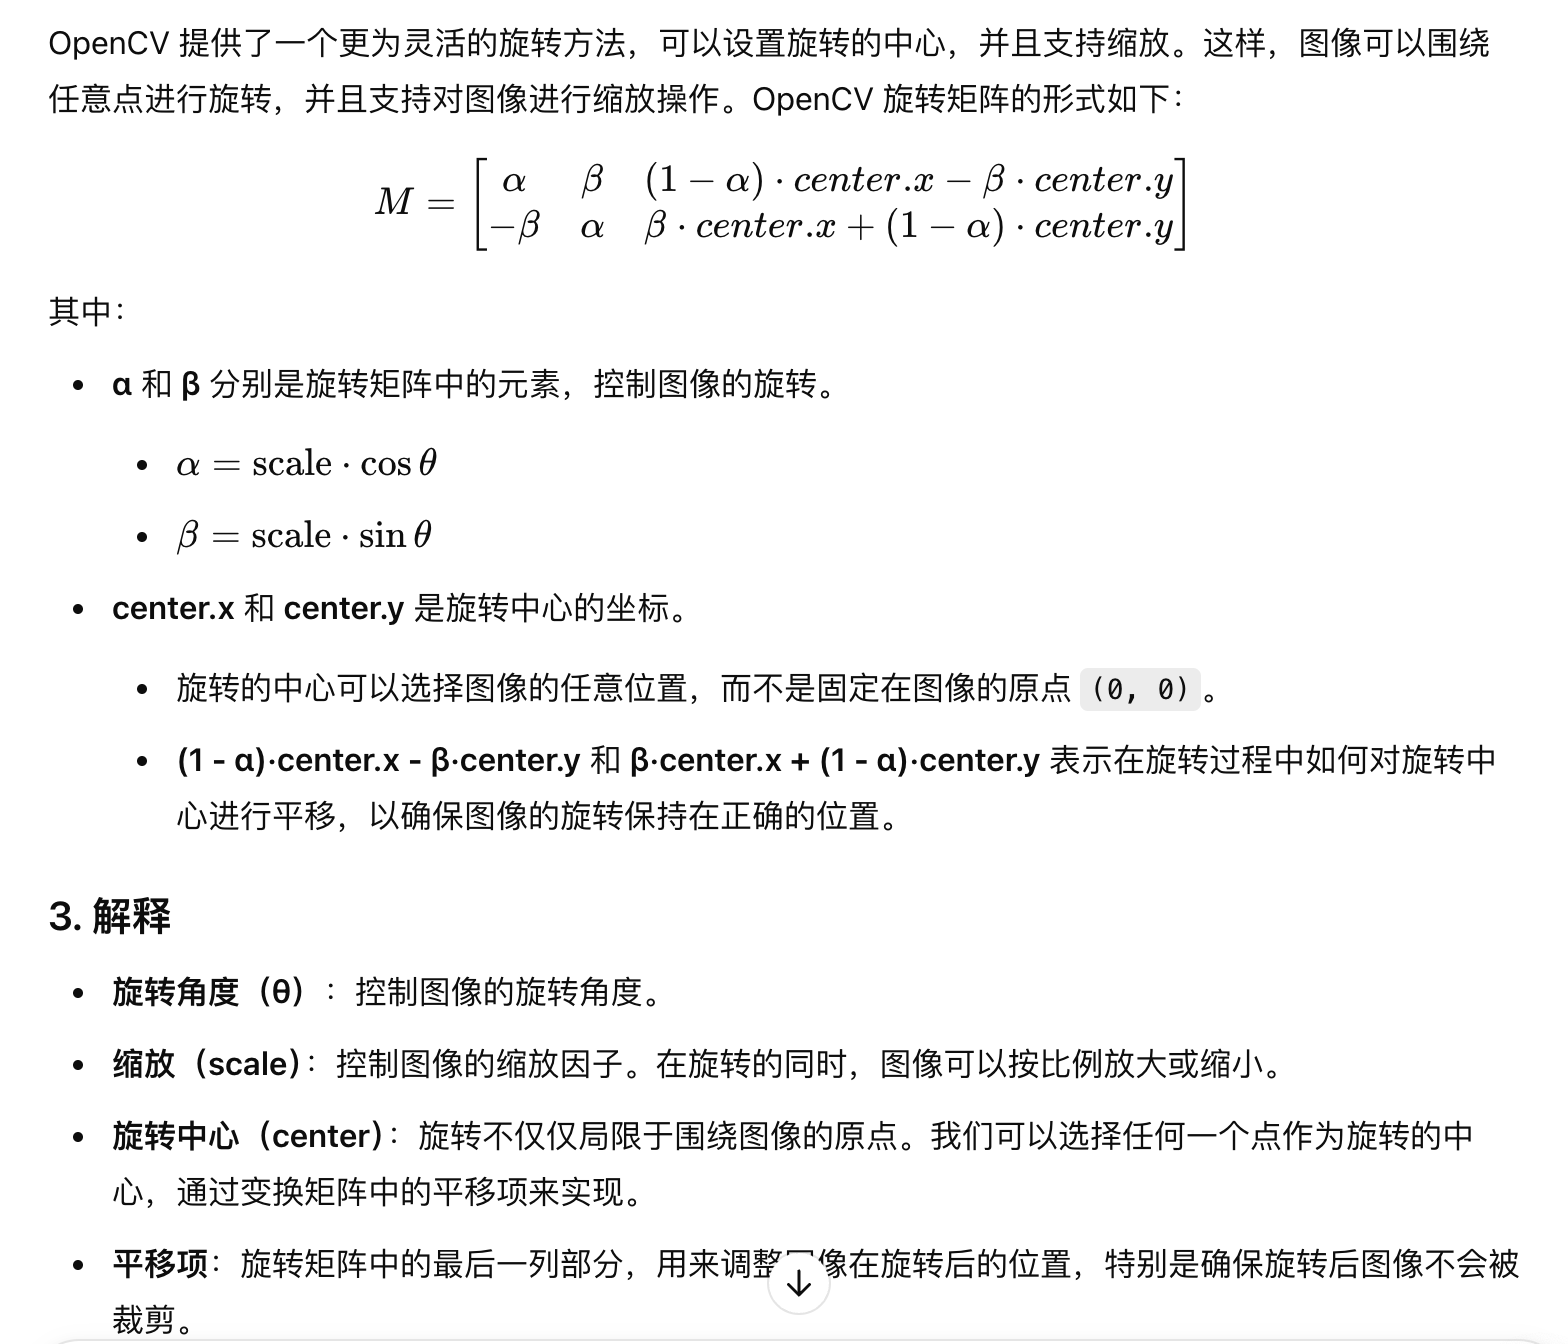

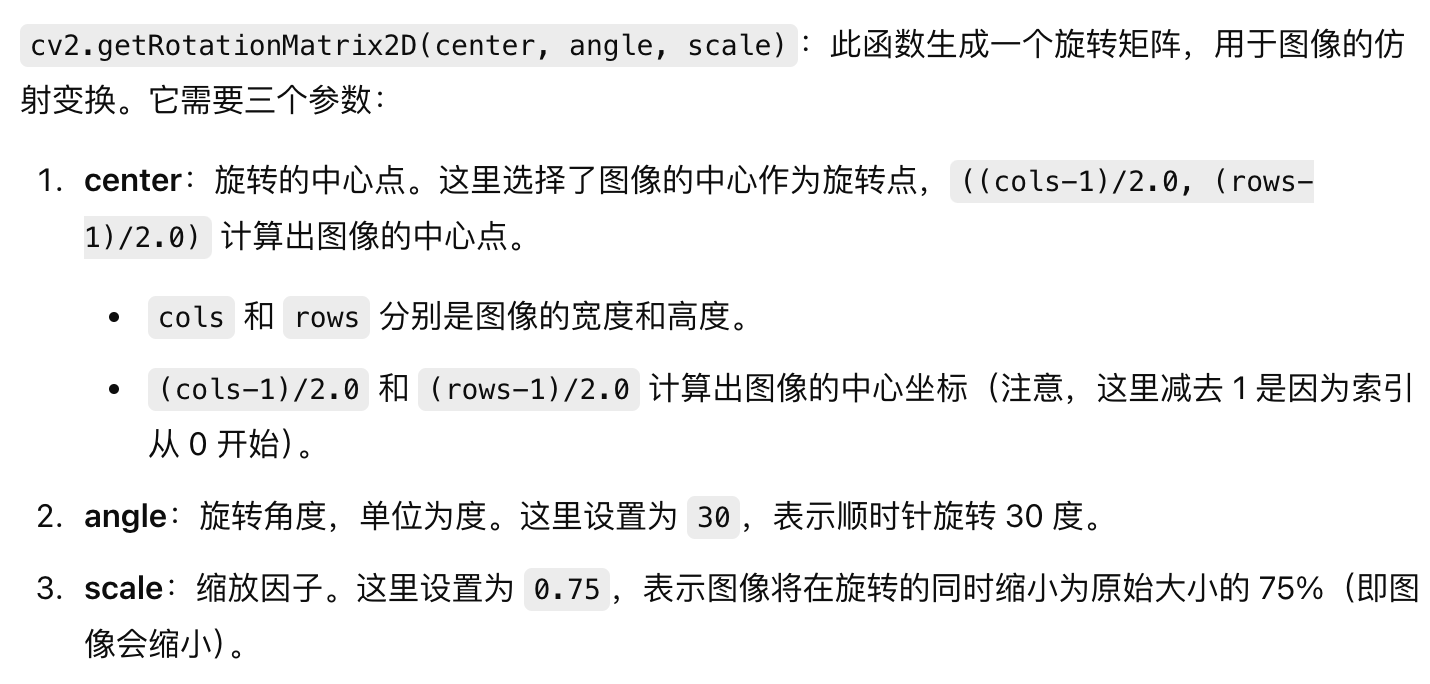

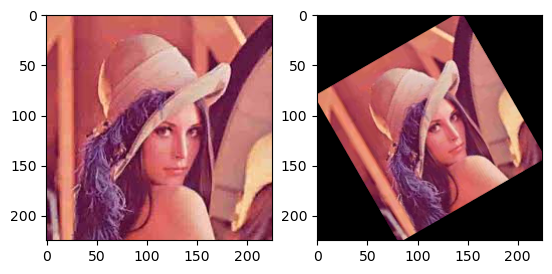

In [34]:
img =cv2.imread('lenna.jpg')   # Read image in BGR mode
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows,cols = img.shape[:2]

M = cv2.getRotationMatrix2D(((cols-1)/2.0,(rows-1)/2.0),30,0.75)
dst = cv2.warpAffine(img,M,(cols,rows))

ax1 = plt.subplot(1,2,1)
plt.sca(ax1) 
plt.imshow(img)

ax2 = plt.subplot(1,2,2)
plt.sca(ax2) 
plt.imshow(dst)

### 3.3 Affine transformation
In affine transformation, all parallel lines in the original image will still be parallel in the output image. To find the transformation matrix, we need three points from the input image and their corresponding locations in the output image. Then cv2.getAffineTransform will create a 2x3 matrix which is to be passed to cv2.warpAffine.

仿射变换，保持原图中的平行线在变换后人平行，保持图像的线性关系。
选择三个点，以及其变换后的位置（2 $\times$ 3矩阵）

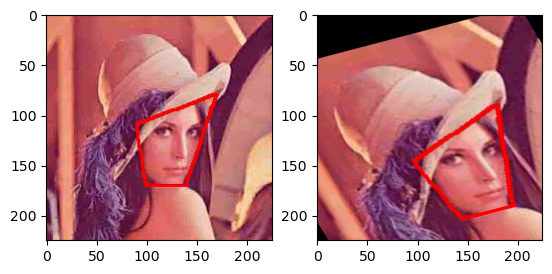

In [ ]:
img =cv2.imread('lenna4trans.jpg')   # Read image in BGR mode
rows,cols = img.shape[:2]

#pt1 = [110, 90]
#pt2 = [80, 170]
#pt3 = [170, 140]
#pt4 = [170, 100]
pts1 = np.float32([[50,50],[200,50],[50,200]])
pts2 = np.float32([[10,100],[200,50],[100,250]])

#这里函数需要源点和目标点，都是3*2的矩阵
M = cv2.getAffineTransform(pts1,pts2)
#返回的就是2*3的仿射变换矩阵


dst = cv2.warpAffine(img,M,(cols,rows))

ax1 = plt.subplot(1,2,1)
plt.sca(ax1) 
plt.imshow(img)

ax2 = plt.subplot(1,2,2)
plt.sca(ax2) 
plt.imshow(dst)

#### 3.4 Perspective Transformation
For perspective transformation, you need a 3x3 transformation matrix. Straight lines will remain straight even after the transformation. To find this transformation matrix, you need 4 points on the input image and corresponding points on the output image. Among these 4 points, 3 of them should not be collinear. Then the transformation matrix can be found by the function cv2.getPerspectiveTransform. Then apply cv.warpPerspective with this 3x3 transformation matrix.

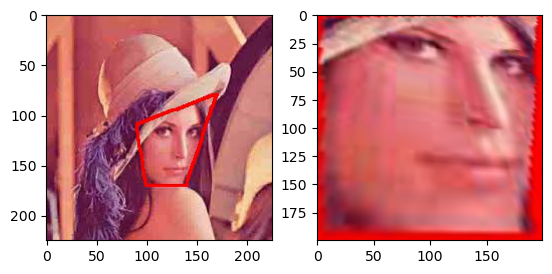

In [10]:
img =cv2.imread('lenna4trans.jpg')   # Read image in BGR mode
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
rows,cols = img.shape[:2]

#pt1 = [110, 90]
#pt2 = [80, 170]
#pt3 = [170, 140]
#pt4 = [170, 100]
pts1 = np.float32([[90,110],[170,80],[100,170],[140,170]])
pts2 = np.float32([[0,0],[200,0],[0,200],[200,200]])
 
M = cv2.getPerspectiveTransform(pts1,pts2)
 
dst = cv2.warpPerspective(img,M,(200,200))


ax1 = plt.subplot(1,2,1)
plt.sca(ax1) 
plt.imshow(img)

ax2 = plt.subplot(1,2,2)
plt.sca(ax2) 
plt.imshow(dst)

## Reference
1. https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html